<a href="https://colab.research.google.com/github/guybrush1989/DMT-Group80/blob/master/dataExploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [128]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
# After executing the cell above, Drive
# files will be present in "/content/drive/My Drive".
!ls '/content/drive/My Drive/Group 80 - DTM/assignment1/'

assignment_1_advanced.pdf  dataset_mood_smartphone.csv


In [129]:
import pandas as pd

data = pd.read_csv('/content/drive/My Drive/Group 80 - DTM/assignment1/dataset_mood_smartphone.csv')
print(data)

        Unnamed: 0       id                     time        variable   value
0                1  AS14.01  2014-02-26 13:00:00.000            mood   6.000
1                2  AS14.01  2014-02-26 15:00:00.000            mood   6.000
2                3  AS14.01  2014-02-26 18:00:00.000            mood   6.000
3                4  AS14.01  2014-02-26 21:00:00.000            mood   7.000
4                5  AS14.01  2014-02-27 09:00:00.000            mood   6.000
...            ...      ...                      ...             ...     ...
376907     2770399  AS14.30  2014-04-11 07:51:16.948  appCat.weather   8.032
376908     2772465  AS14.30  2014-04-19 11:00:32.747  appCat.weather   3.008
376909     2774026  AS14.30  2014-04-26 10:19:07.434  appCat.weather   7.026
376910     2774133  AS14.30  2014-04-27 00:44:48.450  appCat.weather  23.033
376911     2784435  AS14.32  2014-04-07 18:25:14.036  appCat.weather  22.431

[376912 rows x 5 columns]


In [130]:
print('data.shape')
print(data.shape)
print('-----------------------------------')
print('data.dtypes')
print(data.dtypes)
print('-----------------------------------')
print('data.describe()')
print(data.describe())
print('-----------------------------------')
print('data.id.describe()')
print(data.id.describe())
print('-----------------------------------')
print('data.time.describe()')
print(data.time.describe())
print('-----------------------------------')
print('data.variable.describe()')
print(data.variable.describe())
print('-----------------------------------')
print('data.value.describe()')
print(data.value.describe())


data.shape
(376912, 5)
-----------------------------------
data.dtypes
Unnamed: 0      int64
id             object
time           object
variable       object
value         float64
dtype: object
-----------------------------------
data.describe()
         Unnamed: 0          value
count  3.769120e+05  376710.000000
mean   4.501273e+05      40.665313
std    5.411519e+05     273.726007
min    1.000000e+00  -82798.871000
25%    9.422875e+04       2.025000
50%    2.274385e+05       7.029000
75%    5.160412e+05      29.356000
max    1.427711e+07   33960.246000
-----------------------------------
data.id.describe()
count      376912
unique         27
top       AS14.01
freq        21999
Name: id, dtype: object
-----------------------------------
data.time.describe()
count                      376912
unique                     336907
top       2014-04-14 12:00:00.000
freq                           91
Name: time, dtype: object
-----------------------------------
data.variable.describe()
count  

In [131]:
print(data.variable.unique())

['mood' 'circumplex.arousal' 'circumplex.valence' 'activity' 'screen'
 'call' 'sms' 'appCat.builtin' 'appCat.communication'
 'appCat.entertainment' 'appCat.finance' 'appCat.game' 'appCat.office'
 'appCat.other' 'appCat.social' 'appCat.travel' 'appCat.unknown'
 'appCat.utilities' 'appCat.weather']


In [132]:
print(data.id.unique())

['AS14.01' 'AS14.02' 'AS14.03' 'AS14.05' 'AS14.06' 'AS14.07' 'AS14.08'
 'AS14.09' 'AS14.12' 'AS14.13' 'AS14.14' 'AS14.15' 'AS14.16' 'AS14.17'
 'AS14.19' 'AS14.20' 'AS14.23' 'AS14.24' 'AS14.25' 'AS14.26' 'AS14.27'
 'AS14.28' 'AS14.29' 'AS14.30' 'AS14.31' 'AS14.32' 'AS14.33']


In [133]:
data[data.id.eq('AS14.33') & data.time.eq('2014-04-16 15:00:00.000')]

,Unnamed: 0,id,time,variable,value
5449,5450,AS14.33,2014-04-16 15:00:00.000,mood,7.000000
11092,11093,AS14.33,2014-04-16 15:00:00.000,circumplex.arousal,-1.000000
16735,16736,AS14.33,2014-04-16 15:00:00.000,circumplex.valence,1.000000
38889,38890,AS14.33,2014-04-16 15:00:00.000,activity,0.341667


In [0]:
data_reshape = pd.pivot_table(data, values='value', index=['id','time'],columns='variable')

In [135]:
print(data_reshape)

variable                         activity  appCat.builtin  ...  screen  sms
id      time                                               ...             
AS14.01 2014-02-17 12:04:42.394       NaN             NaN  ...     NaN  NaN
        2014-02-17 18:28:25.520       NaN             NaN  ...     NaN  NaN
        2014-02-18 09:29:51.257       NaN             NaN  ...     NaN  NaN
        2014-02-19 14:43:30.575       NaN             NaN  ...     NaN  NaN
        2014-02-19 17:29:10.378       NaN             NaN  ...     NaN  NaN
...                                   ...             ...  ...     ...  ...
AS14.33 2014-05-30 22:32:05.016       NaN             NaN  ...     NaN  NaN
        2014-05-30 22:32:11.049       NaN           3.122  ...     NaN  NaN
        2014-05-30 22:32:14.240       NaN           1.003  ...     NaN  NaN
        2014-05-30 22:32:15.246       NaN           4.134  ...     NaN  NaN
        2014-05-31 12:00:00.000       NaN             NaN  ...     NaN  NaN

[358926 row

In [89]:
print(data_reshape.columns)
data_mood = data_reshape.query('mood != ["NaN"]')

Index(['activity', 'appCat.builtin', 'appCat.communication',
       'appCat.entertainment', 'appCat.finance', 'appCat.game',
       'appCat.office', 'appCat.other', 'appCat.social', 'appCat.travel',
       'appCat.unknown', 'appCat.utilities', 'appCat.weather', 'call',
       'circumplex.arousal', 'circumplex.valence', 'mood', 'screen', 'sms'],
      dtype='object', name='variable')


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much

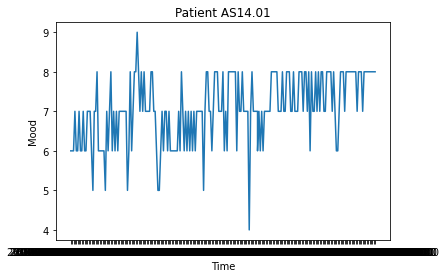

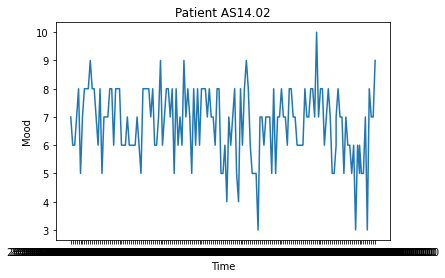

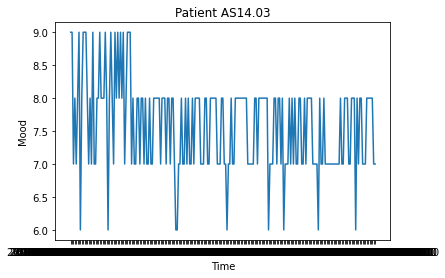

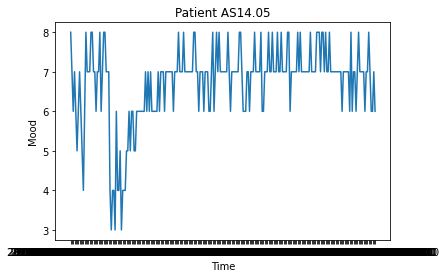

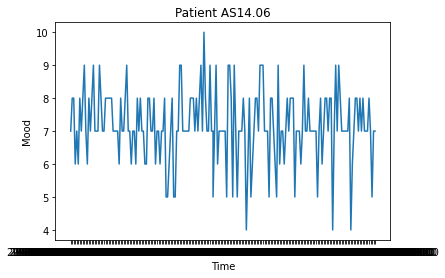

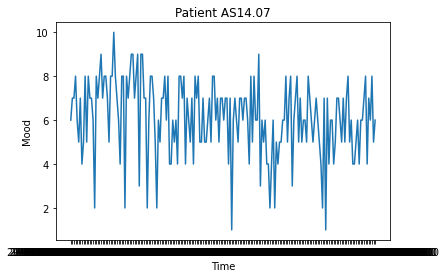

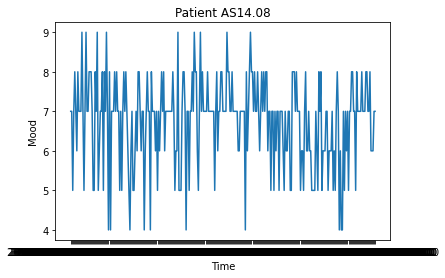

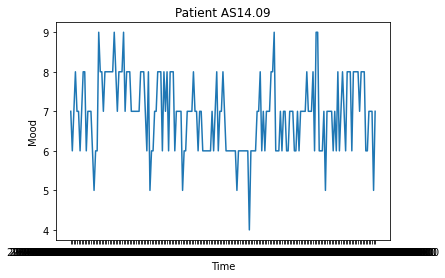

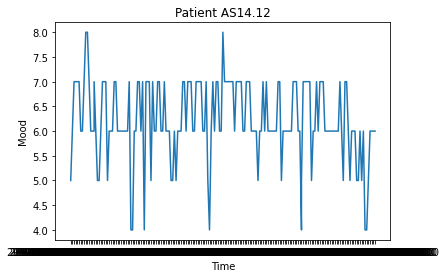

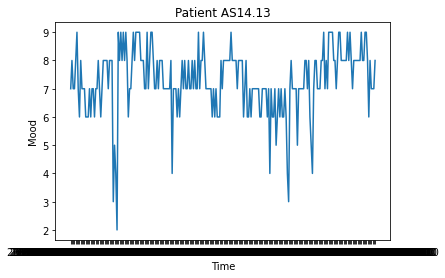

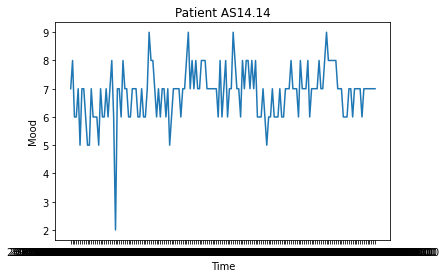

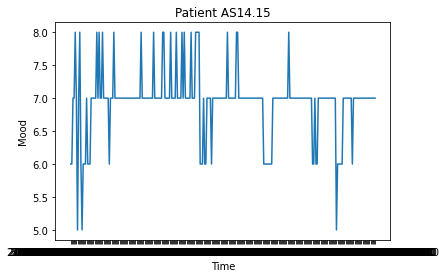

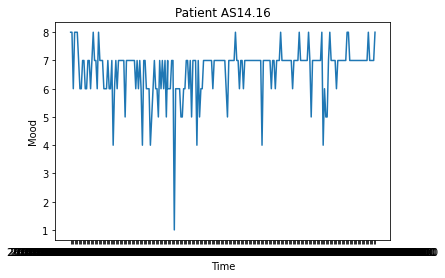

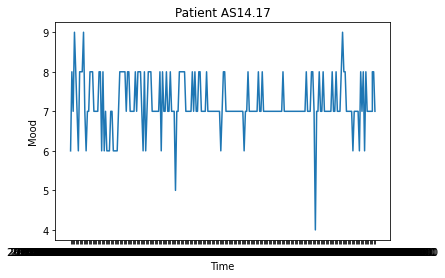

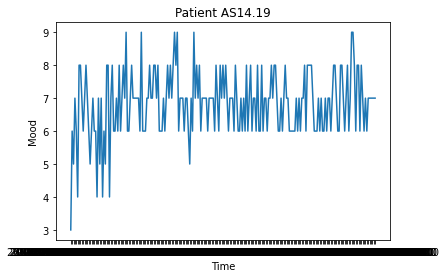

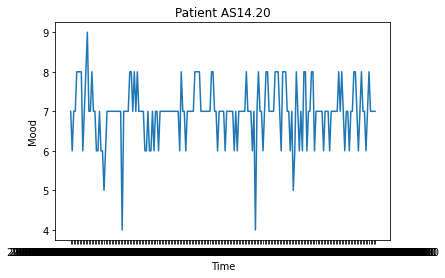

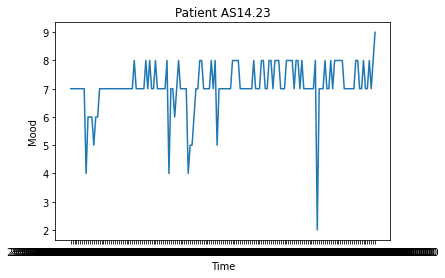

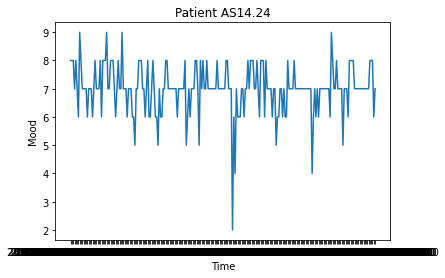

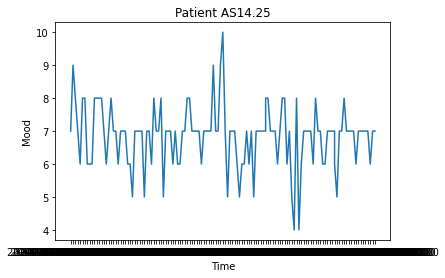

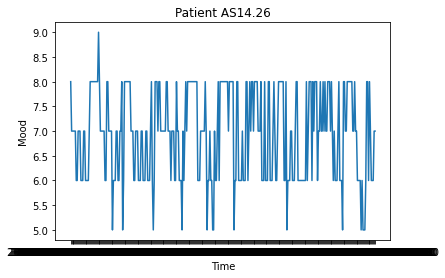

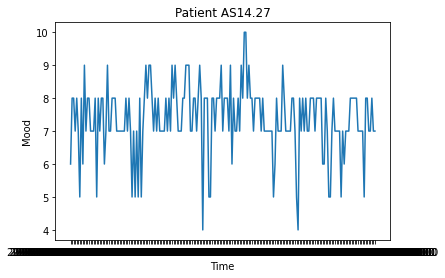

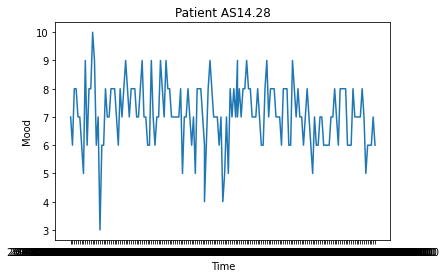

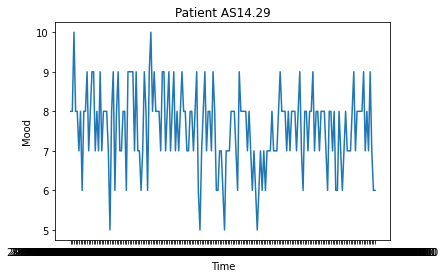

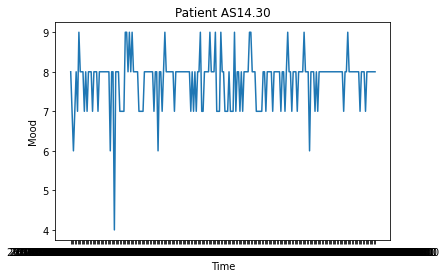

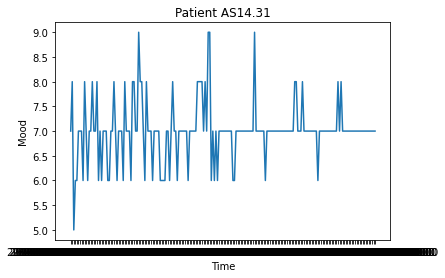

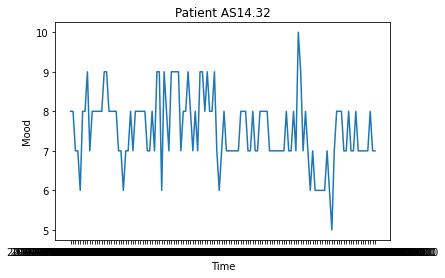

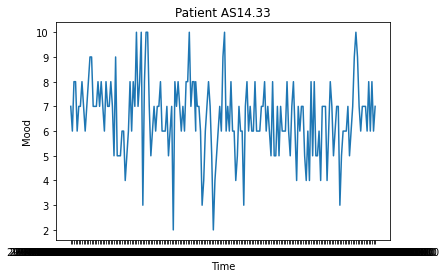

In [155]:
for i in data.id.unique():
  data_mood_i = data[data.id.eq(i) & data.variable.eq('mood')]
  #print(data_mood_i)
  plt.figure(i)
  plt.title('Patient ' + i)
  plt.xlabel('Time')
  plt.ylabel('Mood')
  plt.plot(data_mood_i.time, data_mood_i.value)